In [84]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
conn=sqlite3.connect('sale_data.db')
cursor=conn.cursor()

In [8]:
cursor.execute('''create table if not exists sale (order_id int  serial, product text,quantity int,price float)''')

In [40]:
data=[('T-shirt', 20, 15.99),
('Jeans', 15, 39.99),
('Jacket', 10, 59.99),
('Shoes', 30, 49.99),
('Sweater', 25, 29.99),
('Cap', 40, 12.99),
('Scarf', 35, 19.99),
('Shorts', 50, 22.99),
('Dress', 10, 79.99),
('Socks', 100, 5.99)]


In [41]:
cursor.executemany('insert into sale (product,quantity,price) values(?,?,?)',data)

In [75]:
query="""SELECT product, sum(quantity) as total_quantity_sold ,sum(quantity*price) as total_revenue from sale 
group by product order by total_revenue desc;""" 

In [76]:
df=pd.read_sql_query(query,conn)

In [77]:
print(df)

   product  total_quantity_sold  total_revenue
0    Shoes                   30        1499.70
1   Shorts                   50        1149.50
2    Dress                   10         799.90
3  Sweater                   25         749.75
4    Scarf                   35         699.65
5   Jacket                   10         599.90
6    Jeans                   15         599.85
7    Socks                  100         599.00
8      Cap                   40         519.60
9  T-shirt                   20         319.80


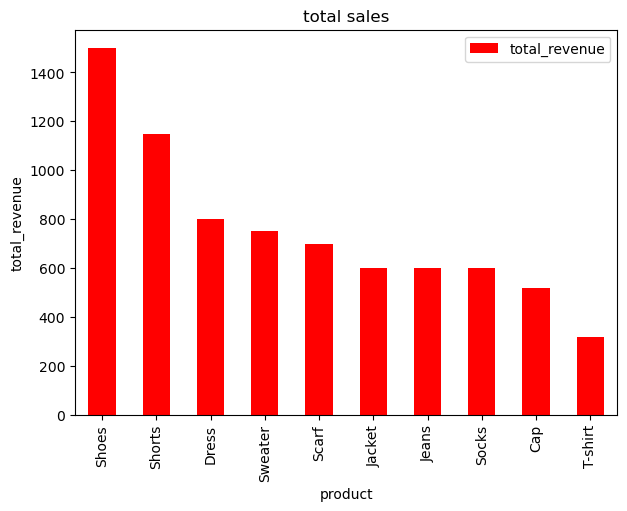

In [90]:
 
df.plot(kind='bar',x='product', y='total_revenue',title='total sales',color='African violet',figsize=(7,5))
plt.ylabel('total_revenue')
plt.xlabel('product')
plt.show()